# Fichero `adult.csv` — Preparación de datos y modelo supervisado

Este notebook reúne **todo lo trabajado** hasta ahora:
1. Carga del dataset `adult.csv`
2. Creación del **dataset reducido** (solo columnas objetivo)
3. Limpieza de valores ausentes (`?` → `NaN`) y eliminación de filas incompletas
4. Definición de **X** e **y** (objetivo: `income`)
5. Identificación de variables **numéricas** y **categóricas**
6. Preprocesado con **ColumnTransformer** (StandardScaler + OneHotEncoder)
7. División **train/test**
8. Entrenamiento de un **modelo** (Regresión Logística)
9. Evaluación básica (classification report + matriz de confusión)



## 1. Carga del dataset

Nos aseguramos de que `adult.csv` está en la misma carpeta que este notebook.

In [62]:
# Importando las librerias
import os as os
import numpy as np
import pandas as pd

os.listdir()

['adult.csv', 'EstudioDatos_03_alum.ipynb']

## 2. Creación del dataset reducido (solo columnas objetivo)
**Variables que se conservarán (las únicas permitidas en la práctica):**



In [63]:
df_adulto = pd.read_csv("adult.csv")

columnas_objetivo = ["age", "workclass", "education", "occupation", "race", "sex", "capital.gain", "native.country", "hours.per.week", "income"]

df_adulto = df_adulto[columnas_objetivo]
df_adulto

,age,workclass,education,occupation,race,sex,capital.gain,native.country,hours.per.week,income
0,90,?,HS-grad,?,White,Female,0,United-States,40,<=50K
1,82,Private,HS-grad,Exec-managerial,White,Female,0,United-States,18,<=50K
2,66,?,Some-college,?,Black,Female,0,United-States,40,<=50K
3,54,Private,7th-8th,Machine-op-inspct,White,Female,0,United-States,40,<=50K
4,41,Private,Some-college,Prof-specialty,White,Female,0,United-States,40,<=50K
...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,Some-college,Protective-serv,White,Male,0,United-States,40,<=50K
32557,27,Private,Assoc-acdm,Tech-support,White,Female,0,United-States,38,<=50K
32558,40,Private,HS-grad,Machine-op-inspct,White,Male,0,United-States,40,>50K
32559,58,Private,HS-grad,Adm-clerical,White,Female,0,United-States,40,<=50K


## 3. Limpieza del dataset reducido

En adult.csv, los valores ausentes a veces aparecen como `?` en algunas columnas, como podemos ver en la celda anterior
- Sustituimos `?` por `NaN`
- Comprobamos nulos por columna


In [64]:
df_adulto.replace("?", np.nan, inplace=True)

df_adulto.isna().sum()


age                  0
workclass         1836
education            0
occupation        1843
race                 0
sex                  0
capital.gain         0
native.country     583
hours.per.week       0
income               0
dtype: int64

## 4. Definir el problema supervisado: predicción de salario (`income`)

In [65]:
# Deberemos de conocer los dos posibles valores de income
# - <=50K
# - 50K

# Debido a esto es supervisada (conocemos los valores reales de income) y es binaria porque tenemos dos clases posibles.

## 5. Identificación de variables numéricas y categóricas

De lo anterior vemos que hay:
- variables numéricas: 
- variables categóricas:

In [66]:
## Las variables numéricas son: edad, capital.gain y hours.per.week

## Las variables categóricas son: workclass, education, race, sex, native.country e income

In [67]:
df_adulto.dtypes

age                int64
workclass         object
education         object
occupation        object
race              object
sex               object
capital.gain       int64
native.country    object
hours.per.week     int64
income            object
dtype: object

### Preprocesado de los datos

En esta fase se preparan las variables para su uso en el modelo de Machine Learning.
Dado que el conjunto de datos contiene variables numéricas y categóricas, se aplican
técnicas de preprocesado diferenciadas, incluyendo la imputación de valores nulos,
el escalado de variables numéricas y la codificación de variables categóricas mediante
One-Hot Encoding.


In [68]:
# Al haber dos casos posibles de income, vamos a sustituirlo por cero o uno.
df_adulto.replace("<=50K", 0, inplace=True)
df_adulto.replace(">50K", 1, inplace=True)

df_adulto

/tmp/ipykernel_48652/3973584303.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_adulto.replace(">50K", 1, inplace=True)


,age,workclass,education,occupation,race,sex,capital.gain,native.country,hours.per.week,income
0,90,NaN,HS-grad,NaN,White,Female,0,United-States,40,0
1,82,Private,HS-grad,Exec-managerial,White,Female,0,United-States,18,0
2,66,NaN,Some-college,NaN,Black,Female,0,United-States,40,0
3,54,Private,7th-8th,Machine-op-inspct,White,Female,0,United-States,40,0
4,41,Private,Some-college,Prof-specialty,White,Female,0,United-States,40,0
...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,Some-college,Protective-serv,White,Male,0,United-States,40,0
32557,27,Private,Assoc-acdm,Tech-support,White,Female,0,United-States,38,0
32558,40,Private,HS-grad,Machine-op-inspct,White,Male,0,United-States,40,1
32559,58,Private,HS-grad,Adm-clerical,White,Female,0,United-States,40,0


In [69]:
# Para resolver, deberemos de comprobar como podemos predecir el salario (income), para ello podemos comprobar en que basarnos para asi poder predecir el valor.
df_adulto.corr(numeric_only=True)

,age,capital.gain,hours.per.week,income
age,1.000000,0.077674,0.068756,0.234037
capital.gain,0.077674,1.000000,0.078409,0.223329
hours.per.week,0.068756,0.078409,1.000000,0.229689
income,0.234037,0.223329,0.229689,1.000000


In [129]:
num_cols = ["age", "capital.gain", "hours.per.week"]
cat_cols = ["workclass", "education", "occupation", "race", "sex", "native.country"]

X = df_adulto.drop(columns="income")
y = df_adulto["income"].to_frame()

print(X.shape)
print(y.shape)

(32561, 9)
(32561, 1)


## 6. Preprocesado con sklearn (pipeline)

Ahora terminamos de preparar todo

In [135]:
# Librerias para crear el modelo y normalizar datos
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

# Transformacion para columnas numericas
escalado = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Transformacion para las columnas categoricas
codificacion = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ('num', escalado, num_cols),
        ('cat', codificacion, cat_cols)
    ]
)


## 7. Train / test

In [133]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=16, stratify=y
)


## 8. Creacion del modelo

In [137]:
modelo = Pipeline(steps=[
    ('preprocess', preprocess),
    ('clf', LogisticRegression(max_iter=2000, random_state=16))
])


In [138]:
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

y_pred[:10]

/home/ciabd10/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## 9. Evaluación
Aquí vemos la matriz de confusion

In [141]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
cm

array([[5824,  357],
       [1083,  877]])

In [142]:
print(classification_report(y_test, y_pred, target_names=['<=50K', '>50K']))

              precision    recall  f1-score   support

       <=50K       0.84      0.94      0.89      6181
        >50K       0.71      0.45      0.55      1960

    accuracy                           0.82      8141
   macro avg       0.78      0.69      0.72      8141
weighted avg       0.81      0.82      0.81      8141



## 7. División en entrenamiento y prueba

### Entrenamiento del modelo

Una vez definidos el conjunto de entrenamiento y el preprocesado de los datos,
se procede al entrenamiento de un modelo de clasificación basado en regresión logística,
utilizado como modelo base para este problema.


In [101]:
y_pred = lr.predict(X_test)

In [102]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(10746,))

## 8. Regresión


### Evaluación del modelo

El rendimiento del modelo se evalúa utilizando distintas métricas de clasificación,
así como la matriz de confusión, con el objetivo de analizar su capacidad predictiva
y detectar posibles limitaciones.


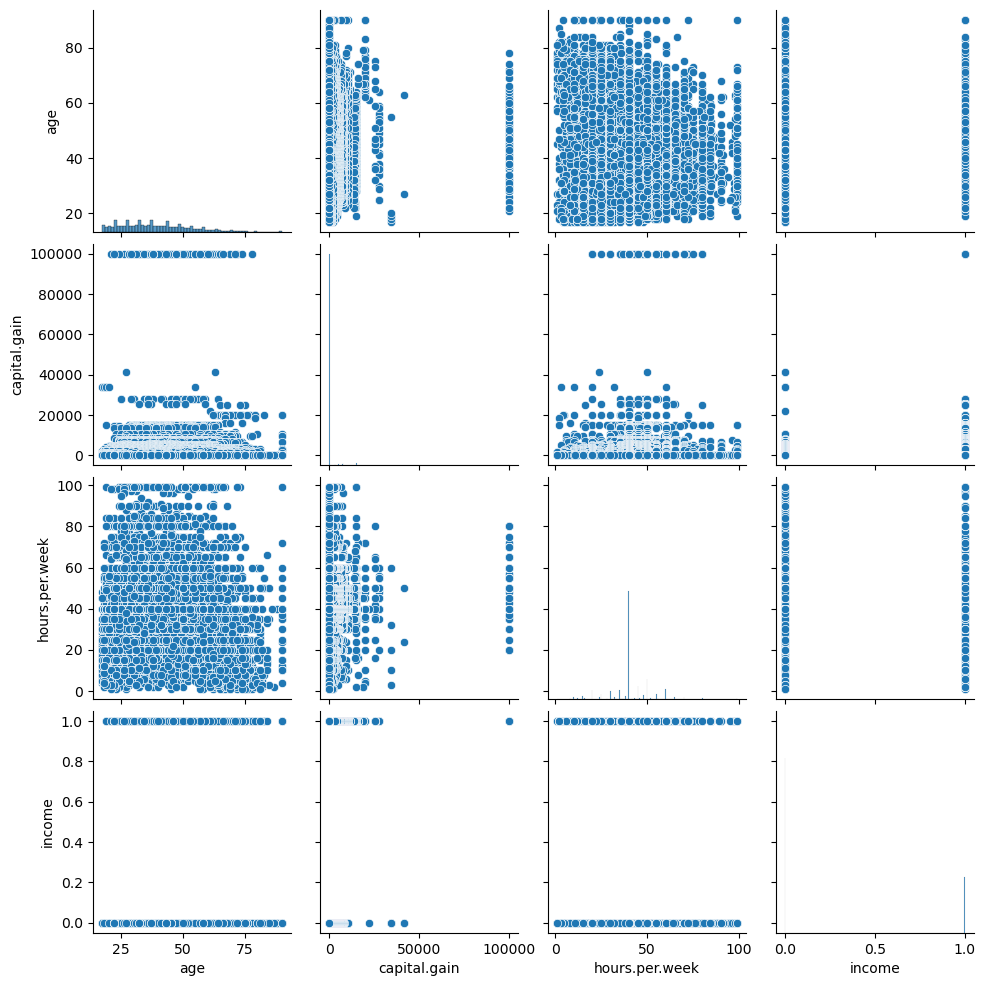

In [110]:
# Utiliza pairplot y analiza el resultado
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_adulto)

## 9. Evaluación del modelo


In [111]:
# Para evaluar el modelo podremos hacerlo mediante los distintos valores que se pueden calcular, como r2, error cuadratico medio...
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

# Es mal resultado

-0.1419842491770258